# Optical flow, motion tracking, segmentation, stereo vision
Erik Matovič  
A solution inspired by [Open CV optical flow tutorial](https://docs.opencv.org/4.x/d4/dee/tutorial_optical_flow.html)   


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#from utils import show_img, resize_img, calc_histogram_show, plt_img, equalize_hist, gamma_coorection

print(cv2.__version__)

4.7.0


## Sparse optical flow

Visualize trajectories of moving objects.

Optional task: Identify each object using a bounding box and count them.

Use following functions: cv::goodFeaturesToTrack, cv::calcOpticalFlowPyrLK

In [3]:
def sparse_optical_flow(cap: cv2.VideoCapture, out: cv2.VideoWriter, 
                        ShiTomasi_params: dict, pyrLK_params: dict) -> None:
    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

    # ShiTomasi corner detection
    corners = cv2.goodFeaturesToTrack(old_gray, **ShiTomasi_params)

    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)

    # list of random colors
    color = np.random.randint(0, 255, (100, 3))

    # Lucas-Kanade Optical Flow
    ret, frame = cap.read()
    while(ret):
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # calculate optical flow
        # nextPts = 2D next points
        # st = status vector, 1 if the the corresponding features has been found
        nextPts, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, corners, None, **pyrLK_params)
        
        # Select good points based on status
        if nextPts is not None:
            good_new = nextPts[st==1]
            good_old = corners[st==1]

        # draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            if i >= len(color):
                  i %= 10 

            a, b = new.ravel()
            c, d = old.ravel()
            pt1, pt2 = (int(a), int(b)), (int(c), int(d))
            mask = cv2.line(mask, pt1, pt2, color[i].tolist()) #, thickness=5)
            #frame = cv2.circle(frame, pt1, 10, color[i].tolist(), -1)
        img = cv2.add(frame, mask)
        #cv2.imshow('frame', img)
        #cv2.waitKey(0)
        # write the flipped frame
        out.write(img)
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        corners = good_new.reshape(-1, 1, 2)

        # read next frame
        ret, frame = cap.read()
        
    # Release everything if job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [3]:
def get_cap_out(video_path:str, out_root:str='..', start_idx:int=15) -> tuple:
    """
    returns: cv2.VideoCapture, cv2.VideoWriter 
    """
    # load video
    cap = cv2.VideoCapture(video_path)

    # Default resolutions of the frame are obtained.The default resolutions are system dependent.
    # We convert the resolutions from float to integer.
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    # make video writer
    out = cv2.VideoWriter(out_root + video_path[start_idx:-4] + '.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
    return cap, out

In [27]:
out_root = '../sparse_optical_flow'
ShiTomasi_params = dict(mask = None, 
    maxCorners = 10000,         # max number of corners to return
    qualityLevel = 0.1,       # min accepted quality of img corners
    minDistance = 1,           # min possible Euclidean distance between the returned corners
    blockSize = 1,             # size of an average block for computing a derivative covariation matrix over each pixel neighborhood
    useHarrisDetector = False 
)

pyrLK_params = dict(winSize  = (41, 41),   # size of the search window at each pyramid lvl
                 maxLevel = 4,          # max pyramid level number
                 # termination criteria
                 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

cap, out = get_cap_out('../data/archive/fourway.avi', out_root)
sparse_optical_flow(cap, out, ShiTomasi_params, pyrLK_params)

In [28]:
ShiTomasi_params = dict(mask = None, 
    maxCorners = 10000,         # max number of corners to return
    qualityLevel = 0.1,       # min accepted quality of img corners
    minDistance = 1,           # min possible Euclidean distance between the returned corners
    blockSize = 1,             # size of an average block for computing a derivative covariation matrix over each pixel neighborhood
    useHarrisDetector = False 
)

pyrLK_params = dict(winSize  = (41, 41),   # size of the search window at each pyramid lvl
                 maxLevel = 4,          # max pyramid level number
                 # termination criteria
                 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
cap, out = get_cap_out('../data/archive/crosswalk.avi', out_root)
sparse_optical_flow(cap, out, ShiTomasi_params, pyrLK_params)

In [29]:
ShiTomasi_params = dict(mask = None, 
    maxCorners = 10000,         # max number of corners to return
    qualityLevel = 0.1,       # min accepted quality of img corners
    minDistance = 1,           # min possible Euclidean distance between the returned corners
    blockSize = 1,             # size of an average block for computing a derivative covariation matrix over each pixel neighborhood
    useHarrisDetector = False 
)

pyrLK_params = dict(winSize  = (41, 41),   # size of the search window at each pyramid lvl
                 maxLevel = 4,          # max pyramid level number
                 # termination criteria
                 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

cap, out = get_cap_out('../data/archive/night.avi', out_root)
sparse_optical_flow(cap, out, ShiTomasi_params, pyrLK_params)

In [30]:
ShiTomasi_params = dict(mask = None, 
    maxCorners = 10000,         # max number of corners to return
    qualityLevel = 0.1,       # min accepted quality of img corners
    minDistance = 1,           # min possible Euclidean distance between the returned corners
    blockSize = 1,             # size of an average block for computing a derivative covariation matrix over each pixel neighborhood
    useHarrisDetector = False 
)

pyrLK_params = dict(winSize  = (41, 41),   # size of the search window at each pyramid lvl
                 maxLevel = 4,          # max pyramid level number
                 # termination criteria
                 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

cap, out = get_cap_out('../data/JAAD/video_0028.mp4', out_root, -15)
ret, old_frame = cap.read()
sparse_optical_flow(cap, out, ShiTomasi_params, pyrLK_params)

## Dense optical flow

Identify moving objects in video and draw green rectangle around them.

Use downsampled video for this task if necessary for easier processing.

Use following functions: cv::calcOpticalFlowFarneback

[OpenCV's tutorial on how to optical flow](https://docs.opencv.org/4.x/d4/dee/tutorial_optical_flow.html)

In [189]:
import random as rng
rng.seed(12345)

def dense_optical_flow(cap: cv2.VideoCapture, out: cv2.VideoWriter,
                       farneback_params: dict) -> None:
    ret, frame1 = cap.read()
    prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255
    ret, frame2 = cap.read()
    while(ret):
        next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        # dense optical flow by Farneback method
        flow = cv2.calcOpticalFlowFarneback(
            prev=prvs,      # first 8-bit single-channel input image 
            next=next,      # second input img with the same size and the same type as prev
            **farneback_params)
        #print(flow[..., 0], flow[..., 1])
        flow[..., 0]
        flow[..., 1]
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        mag = np.sqrt(flow[..., 0]**2 + flow[..., 1]**2)
        #print(flow.shape)
        # img hue according to the optical flow direction
        hsv[..., 0] = (ang * 180) / (2 * np.pi)
        # img value according to the normalized optical flow magnitude
        #print('pred:\n', mag)
        hsv[..., 2] = cv2.normalize(mag, None, 0.0, 255.0, cv2.NORM_MINMAX)
        #hsv = cv.rectangle(hsv, pt1, pt2, color[, thickness[, lineType[, shift]]])
        # Convert HSV to BGR
        #print('po:\n', hsv[..., 2])
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        #print('BGR:\n', bgr)
        #cv.imshow('frame2', bgr)
        gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gray, 0, 50)
        dilated = cv2.dilate(canny, (1, 1), iterations=0)
        (contours, hierarchy) = cv2.findContours(
            dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        #print(contours)

        # loop over the contours
        #for contour in contours:
        #    (x, y, w, h) = cv2.boundingRect(contour)
            # if the contour is too small, ignore it
        #    if w > 10 and h > 10 and w < 900 and h < 680:
        #        cv2.rectangle(bgr, (x, y), (x + w, y + h), (0, 255, 0), 4)
        #        cv2.putText(bgr, 'test', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),1)

        # Approximate contours to polygons + get bounding rects and circles
        #contours_poly = [None]*len(contours)
        #boundRect = [None]*len(contours)
        #centers = [None]*len(contours)
        #radius = [None]*len(contours)
        for i, c in enumerate(contours):
            # Calculate area and remove small elements
            #area = cv2.contourArea(c)
            #if area < 10:
            #    continue
            #contours_poly[i] = cv2.approxPolyDP(c, 3, True)
            #boundRect[i] = cv2.boundingRect(contours_poly[i])
            (x, y, w, h) = cv2.boundingRect(c)
            if w < 50 or h < 50 or w > 900 or h > 800:
                    continue
            color = (0, 255, 0) #(rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
            #cv2.drawContours(bgr, contours_poly, i, color)
            cv2.rectangle(frame2, (x, y), (x + w, y + h), color, 2)
            #centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
            # Draw polygonal contour + bonding rects + circles
        #for i in range(len(contours)):
            # Calculate area and remove small elements
        #    (x, y, w, h) = boundRect[i]
        #    if w < 25 or h < 25 or w > 900 or h > 800:
        #        continue
        #    color = (0, 255, 0) #(rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
            #cv2.drawContours(bgr, contours_poly, i, color)
        #    cv2.rectangle(frame1, (x, y), (x + w, y + h), color, 2)
            #bgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #cv2.rectangle(bgr, (x1, y1), (x2, y2), (255,0,0), 2)
        #cv2.drawContours(bgr, contours, -1, (0, 255, 0), 2)
        #bgr_resize = cv2.resize(frame1, (600, 400))
        #cv2.imshow('frame2', bgr_resize)
        #cv2.waitKey(0)
        #break
        out.write(frame2)
        prvs = next
        ret, frame2 = cap.read()
    cv2.destroyAllWindows()

In [190]:
out_root = '../dense_optical_flow'
cap, out = get_cap_out('../data/archive/night.avi', out_root)

farneback_params = dict(
            flow=None,      # computed flow image, not needed, because it is returned 
            pyr_scale=0.5,  # img scale to build pyramids for each image; pyr_scale=0.5 -> each next layer is twice smaller than the previous. 
            levels=3,       # number of pyramid layers including the initial image   
            winsize=41,     # larger values increase the robustness to image noise  
            iterations=5,   # number of iterations the algorithm does at each pyramid level
            poly_n=5,       # size of the pixel neighborhood; larger values mean that the image will be approximated with smoother surfaces, more robust algorithm and more blurred motion field. 
            poly_sigma=1.5, # standard deviation of the Gaussian 
            flags=0         # operation flags
)
dense_optical_flow(cap, out, farneback_params)

Motion tracking Datasets

Feel free to experiment with multiple videos for motion tracking. Use the following link for additional datasets - https://motchallenge.net/data/MOT15/

## Segmentation using background subtraction

Use background substraction methods to properly segment the moving objects from their background. Use one of the videos with static camera.

Use the following approaches:

    Accumulated weighted image

    Mixture of Gaussian (MOG2)

In [26]:
def MOG2(cap: cv2.VideoCapture, video_path: str, start_idx:int=15) -> None:
    # make video writer
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter(out_root + video_path[start_idx:-4] + '.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height), isColor=False)
    
    backSub = cv2.createBackgroundSubtractorMOG2()
    ret, frame = cap.read()
    count = 0
    while(ret):
        mask = backSub.apply(frame)
        
        cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
        cv2.putText(frame, str(cap.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
        frame_resize = cv2.resize(frame, (600, 400))
        mask__resize = cv2.resize(mask, (600, 400))

        count += 1
        #if count % 100:
        #    cv2.imshow('Frame', frame_resize)
        #    cv2.imshow('FG Mask', mask__resize)
            #cv2.imshow('frame2', bgr_resize)
        #    cv2.waitKey(0)
        #    break
        
        out.write(mask)
        ret, frame = cap.read()
    cv2.destroyAllWindows()

In [27]:
out_root = '../MOG2'
cap, out = get_cap_out('../data/archive/crosswalk.avi', out_root)

MOG2(cap, '../data/archive/crosswalk.avi')

In [9]:
def accumulated_weighted_image(cap: cv2.VideoCapture, out: cv2.VideoWriter, alpha=0.1) -> None:
    """
    :param cap: video capture
    :param out: video writer
    :param alpha: regulates the update speed, how fast the accumulator “forgets” about earlier images. 
        - if alpha is a higher value, average image tries to catch even very fast and short changes in the data. 
        - if it is lower value, average becomes won't consider fast changes in the input images
    """
    ret, frame = cap.read()
    count = 0

    avg1 = np.float32(frame)
    avg2 = np.float32(frame)

    while(ret):
        cv2.accumulateWeighted(src=frame, dst=avg1, alpha=alpha)
        #cv2.accumulateWeighted(src=frame, dst=avg2, alpha=0.01)

        # scaling, taking an absolute value, conversion to an unsigned 8-bit type: 
        avg_img = cv2.convertScaleAbs(avg1)
        #res2 = cv2.convertScaleAbs(avg2)
        
        #cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
        #cv2.putText(frame, str(cap.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
        #        cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
        frame_resize = cv2.resize(frame, (600, 400))
        avg_img_resize = cv2.resize(avg_img, (600, 400))

        #count += 1
        #if count % 100:
        #    cv2.imshow('Frame', frame_resize)
        #    cv2.imshow('avg1', avg1_resize)
        #    cv2.imshow('avg2', avg2_resize)
        #    cv2.waitKey(0)
        #    break

        out.write(avg_img)
        ret, frame = cap.read()
    cv2.destroyAllWindows()

In [11]:
out_root = '../accumulated_weighted_image'
cap, out = get_cap_out('../data/archive/fourway.avi', out_root)

accumulated_weighted_image(cap, out, alpha=2)

In [13]:
out_root = '../accumulated_weighted_image'
cap, out = get_cap_out('../data/archive/fourway.avi', out_root)

accumulated_weighted_image(cap, out, alpha=1.1)

In [14]:
out_root = '../accumulated_weighted_image'
cap, out = get_cap_out('../data/archive/fourway.avi', out_root)

accumulated_weighted_image(cap, out, alpha=0.5)

In [15]:
out_root = '../accumulated_weighted_image'
cap, out = get_cap_out('../data/archive/fourway.avi', out_root)

accumulated_weighted_image(cap, out, alpha=0.1)

In [16]:
out_root = '../accumulated_weighted_image'
cap, out = get_cap_out('../data/archive/fourway.avi', out_root)

accumulated_weighted_image(cap, out, alpha=0.01)

## Grab Cut segmentation

Propose a simple method to segment a rough estimate of lateral ventricle segmentation using morphological processing and thresholding.

[Link, 5 x PNG, 137 KB](https://drive.google.com/file/d/1hnQ_PHx0LhMNCMlpwCFhXVx4fFl9j_Aq/view) 

Use OpenCV's graph cut method to refine segmentation boundary.

cv::grabCut

Input has to be BGR (3 channel)

Values for the mask parameter:

GC_BGD = 0 - an obvious background pixels

GC_FGD = 1 - an obvious foreground (object) pixel

GC_PR_BGD = 2 - a possible background pixel

GC_PR_FGD = 3  - a possible foreground pixel

An example of GrabCut algorithm: [link](https://docs.opencv.org/4.x/dd/dfc/tutorial_js_grabcut.html) (note: This example uses a defined rectangle for grabcut segmentation. In our case we want to use the mask option instead)

In [ ]:
def grab_cut(cap: cv2.VideoCapture, out: cv2.VideoWriter, alpha=0.1) -> None:
    """
    :param cap: video capture
    :param out: video writer
    :param alpha: regulates the update speed, how fast the accumulator “forgets” about earlier images. 
        - if alpha is a higher value, average image tries to catch even very fast and short changes in the data. 
        - if it is lower value, average becomes won't consider fast changes in the input images
    """

    # Step #1: Estimating the color distribution of the foreground and background via a Gaussian Mixture Model (GMM)

    # Step #2: Constructing a Markov random field over the pixels labels (i.e., foreground vs. background)

    # Step #3: Applying a graph cut optimization to arrive at the final segmentation
    


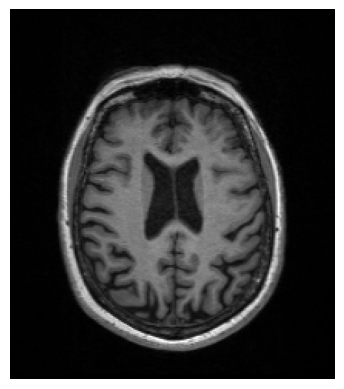

In [40]:
img = cv2.imread('../data/ventricle_segmentation/0.png', flags=cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.imshow(img, cmap='gray')
#plt.colorbar()
plt.axis('off')
plt.show()



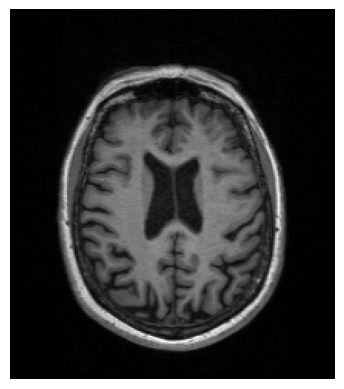

In [41]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img, cmap='gray')
#plt.colorbar()
plt.axis('off')
plt.show()

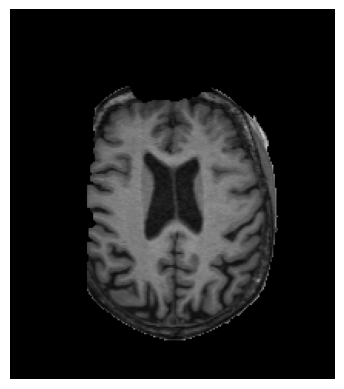

In [51]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_BGD)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img * mask2[:, :, np.newaxis]
plt.imshow(img, cmap='gray')
#plt.colorbar()
plt.axis('off')
plt.show()

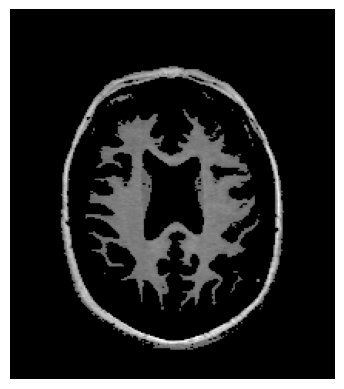

In [70]:
# newmask is the mask image I manually labelled
img = cv2.imread('../data/ventricle_segmentation/0.png')
newmask = cv2.imread('../data/ventricle_segmentation/0.png', cv2.IMREAD_GRAYSCALE)

# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask = np.zeros(img.shape[:2],np.uint8)
#print(newmask.mean())
mask[newmask == 0] = 0
#mask[newmask == 255] = 1
mask[newmask > 100] = 1
mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_FGD)
#mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img)
plt.axis('off')
plt.show()



## VOC12 dataset segmentation

JPEG images: [link](https://drive.google.com/file/d/1MTgdBUwwBljzHIGz3bIqdLfu4qPx-PuP/view) 

Ground truth labels: [link](https://drive.google.com/file/d/1lR-Ihrg7yE0YVS9PxZTW-_XT6C8rZEnc/view)

Propose a simple method for object segmentation. Pick 1-2 images from the provided dataset. You may use one or multiple segmentation methods such as:

    grabcut

    superpixel segmentation

    floodfill

    thresholding

    and so on..

Use provided ground truth label to compute Dice Score with your prediction (you may chose only 1 specific object for segmentation in case of multiple objects presented in the image)